In [1]:
#!pip install d2l
import pandas as pd 
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
import numpy as np
import xgboost as xgb

import tensorflow as tf
from d2l import tensorflow as d2l

#data = pd.read_csv('train_data.csv') # load original dataset 

# split dataset into 75/25 train test split 
# train, test = sklearn.model_selection.train_test_split(data, test_size=.25, random_state=42, shuffle=True, stratify=data['Label'])
# train.to_csv('split_train_data.csv', index = False) # save train data for future use 
# test.to_csv('split_test_data.csv', index = False) # save test data for future use 

train = pd.read_csv('split_train_data.csv')
test = pd.read_csv('split_test_data.csv')
# descriptive info 
shape = train.shape # shape of the training set 
column_names = train.columns # names of the columns 
nunique = train.nunique(axis = 0) # number of unique entries in each column 
describe = train.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

# varriable relationships 
corr = train.corr()

In [2]:
corr

,G26,G26_Target Sequence_in_SMILES_perc,G26_SMILES_in_Target Sequence_perc,G26_ARRO,G26_SMILES_base,G26_SMILES_base_perc,G26_Target Sequence_base,G26_Target Sequence_base_perc,G26_fdp_SMILES_base,G26_fdp_Target Sequence_base,...,G10_Target Sequence_base,G10_Target Sequence_base_perc,G10_fdp_SMILES_base,G10_fdp_Target Sequence_base,G10_fd_SMILES_base,G10_fd_Target Sequence_base,G10_std_SMILES_dist,G10_std_Target Sequence_dist,KIBA,Label
G26,1.000000,-0.658644,-0.633055,0.169460,0.317016,0.046799,0.468876,0.073782,0.658092,0.628796,...,0.435566,-0.024579,0.352305,0.114382,0.427409,0.159265,0.430174,0.111489,0.201958,0.152989
G26_Target Sequence_in_SMILES_perc,-0.658644,1.000000,0.445067,-0.043587,0.066026,-0.089851,-0.519167,0.003909,-0.999657,-0.434097,...,-0.468423,0.034314,-0.457180,-0.006301,-0.460008,-0.062057,-0.461446,-0.009689,-0.138569,-0.101433
G26_SMILES_in_Target Sequence_perc,-0.633055,0.445067,1.000000,-0.060159,-0.351306,-0.052088,0.096178,-0.092368,-0.445232,-0.989815,...,-0.203279,-0.011771,-0.138484,-0.165737,-0.197774,-0.185393,-0.200663,-0.163143,-0.120547,-0.096686
G26_ARRO,0.169460,-0.043587,-0.060159,1.000000,0.017315,-0.002004,0.028395,0.007683,0.043416,0.059851,...,0.022727,0.003300,0.014627,0.005133,0.022306,0.006812,0.022396,0.004067,0.061611,0.024407
G26_SMILES_base,0.317016,0.066026,-0.351306,0.017315,1.000000,-0.124027,0.014272,-0.024344,-0.069111,0.339608,...,-0.015930,0.004881,-0.005021,0.290070,-0.018700,0.271482,-0.016655,0.273123,0.079321,0.076241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G10_fd_Target Sequence_base,0.159265,-0.062057,-0.185393,0.006812,0.271482,0.003418,0.056342,0.002712,0.061979,0.181444,...,0.088498,0.003774,0.174753,0.947796,0.148408,1.000000,0.151270,0.992965,-0.017994,0.000707
G10_std_SMILES_dist,0.430174,-0.461446,-0.200663,0.022396,-0.016655,0.014829,0.470985,0.200450,0.460587,0.224628,...,0.983837,-0.093897,0.790549,0.026387,0.998637,0.151270,1.000000,0.044706,0.210049,0.143338
G10_std_Target Sequence_dist,0.111489,-0.009689,-0.163143,0.004067,0.273123,0.001927,0.002017,-0.017986,0.009713,0.156756,...,-0.019936,0.000643,0.086213,0.954489,0.041350,0.992965,0.044706,1.000000,-0.041591,-0.016061
KIBA,0.201958,-0.138569,-0.120547,0.061611,0.079321,-0.008088,0.084013,0.065451,0.137980,0.127085,...,0.213941,0.002289,0.193341,-0.048125,0.210583,-0.017994,0.210049,-0.041591,1.000000,0.763603


In [8]:
data.columns[:14]

Index(['G26', 'G26_Target Sequence_in_SMILES_perc',
       'G26_SMILES_in_Target Sequence_perc', 'G26_ARRO', 'G26_SMILES_base',
       'G26_SMILES_base_perc', 'G26_Target Sequence_base',
       'G26_Target Sequence_base_perc', 'G26_fdp_SMILES_base',
       'G26_fdp_Target Sequence_base', 'G26_fd_SMILES_base',
       'G26_fd_Target Sequence_base', 'G26_std_SMILES_dist',
       'G26_std_Target Sequence_dist'],
      dtype='object')

In [17]:
data.iloc[:, :14]

,G26,G26_Target Sequence_in_SMILES_perc,G26_SMILES_in_Target Sequence_perc,G26_ARRO,G26_SMILES_base,G26_SMILES_base_perc,G26_Target Sequence_base,G26_Target Sequence_base_perc,G26_fdp_SMILES_base,G26_fdp_Target Sequence_base,G26_fd_SMILES_base,G26_fd_Target Sequence_base,G26_std_SMILES_dist,G26_std_Target Sequence_dist
0,5.073946,0.954991,0.062554,16.739510,5.522422,0.105597,5.062549,0.098782,-0.849394,0.036227,-0.081210,0.002251,-1.406308,0.281301
1,6.826617,0.001154,0.014306,60569.338400,5.590014,0.091748,6.158633,0.126360,0.090594,0.112054,0.221216,0.108463,7.526585,2.646602
2,5.177106,0.818811,0.930755,1.312142,5.556566,0.128679,5.564309,0.099924,-0.690133,-0.830831,-0.068290,-0.069587,-0.813822,-1.115077
3,5.179001,0.183497,0.970300,5.616494,5.258327,0.130410,5.683928,0.086053,-0.053087,-0.884247,-0.015086,-0.088834,-0.071465,-2.502975
4,5.822746,0.029429,0.326915,103.942684,5.621003,0.101558,5.896788,0.281712,0.072129,-0.045202,0.035891,-0.012556,1.872736,0.285750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109474,5.706429,0.185805,0.114284,47.093032,5.747547,0.107905,5.331223,0.334530,-0.077900,0.220246,-0.007154,0.070379,0.495341,1.372400
109475,5.091452,0.922677,0.950718,1.139983,5.456824,0.121177,5.444070,0.204634,-0.801500,-0.746084,-0.066957,-0.064771,-0.722769,-1.269441
109476,6.546598,0.016157,0.045692,1354.569388,5.250993,0.129833,6.357718,0.109280,0.113676,0.063588,0.246735,0.029709,4.253889,1.786510
109477,5.049065,0.941720,0.965568,1.099754,5.300778,0.118292,5.390484,0.150946,-0.823428,-0.814621,-0.047486,-0.063337,-0.905470,-1.163646


In [19]:
default_params = {'learning_rate': 0.1,
 'n_estimators':1000,
 'max_depth':4,
 'min_child_weight':1,
 'min_split_loss':0, #gamma
 'subsample':0.8,
 'colsample_bytree':0.8,
 'objective': 'binary:logistic',
 'scale_pos_weight': 0.25,
 'seed':42,
 'tree_method':'hist'}
from xgboost import XGBClassifier, plot_importance
xg_model = XGBClassifier(**default_params)
xg_model.fit(train.iloc[:, :336], train.iloc[:, 337].astype(int))

/Users/bwubete/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:29:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, min_split_loss=0, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=16,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=0.25, seed=42, subsample=0.8, tree_method='hist',
              validate_parameters=1, verbosity=None)

f1=0.434 auc=0.733


Text(0.5, 1.0, 'P-R Curve on Test Set')

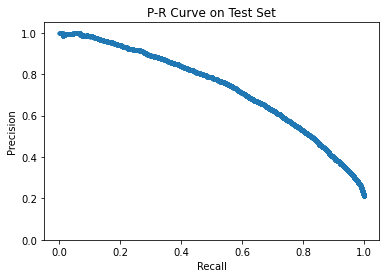

In [21]:
from sklearn.metrics import f1_score, precision_recall_curve, auc, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

probs = xg_model.predict_proba(test.iloc[:, :336])[:,1]
predictions = xg_model.predict(test.iloc[:, :336])

precision, recall, _ = precision_recall_curve(test.iloc[:, 337].astype(int), probs)

f1, auc_score = f1_score(test.iloc[:, 337].astype(int), predictions), auc(recall, precision)

print('f1=%.3f auc=%.3f' % (f1, auc_score))
plt.plot(recall, precision, marker='.')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim(0,1.05)
plt.title('P-R Curve on Test Set')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
default_params = {
 'n_estimators':1000,
 'max_depth':10,
 'random_state':42}
clf = RandomForestClassifier(**default_params)
clf.fit(train.iloc[:, :336], train.iloc[:, 337].astype(int))
probs = clf.predict_proba(test.iloc[:, :336])[:,1]
predictions = clf.predict(test.iloc[:, :336])

precision, recall, _ = precision_recall_curve(test.iloc[:, 337].astype(int), probs)

f1, auc_score = f1_score(test.iloc[:, 337].astype(int), predictions), auc(recall, precision)

print('f1=%.3f auc=%.3f' % (f1, auc_score))
plt.plot(recall, precision, marker='.')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim(0,1.05)
plt.title('P-R Curve on Test Set')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
default_params = {
 'learning_rate': 0.1,
 'n_estimators': 1000,
 'random_state': 42,
}
clf = AdaBoostClassifier(**default_params)
clf.fit(train.iloc[:, :336], train.iloc[:, 337].astype(int))
probs = clf.predict_proba(test.iloc[:, :336])[:,1]
predictions = clf.predict(test.iloc[:, :336])

precision, recall, _ = precision_recall_curve(test.iloc[:, 337].astype(int), probs)

f1, auc_score = f1_score(test.iloc[:, 337].astype(int), predictions), auc(recall, precision)

print('f1=%.3f auc=%.3f' % (f1, auc_score))
plt.plot(recall, precision, marker='.')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim(0,1.05)
plt.title('P-R Curve on Test Set')

In [45]:
np.unique(train['Label'].astype(int).to_numpy(), return_counts=True)

(array([0, 1]), array([64743, 17366]))

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=100)
X_new = selector.fit_transform(train.iloc[:, :336], train.iloc[:, 337].astype(int))

In [21]:
from sklearn.cluster import MiniBatchKMeans, KMeans, SpectralClustering
k_means = KMeans(init='k-means++', n_clusters=5, n_init=10)
k_means.fit(X_new)

KMeans(n_clusters=5)

In [23]:
np.unique(k_means.labels_, return_counts=True)
#selector.get_support(indices=True)

(array([0, 1, 2, 3, 4], dtype=int32),
 array([ 4028, 30464, 31293,  2094, 14230]))

In [26]:
k_means.predict(X_new)

array([1, 4, 2, ..., 0, 2, 1], dtype=int32)

In [29]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array([list(range(5))]).T)
enc.transform(np.array([k_means.predict(X_new)]).T).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [30]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 3, 2), random_state=1)
clf.fit(enc.transform(np.array([k_means.predict(X_new)]).T).toarray(), train.iloc[:, 337].astype(int))

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 3, 2), random_state=1,
              solver='lbfgs')

/Users/bwubete/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:54:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1=0.000 auc=0.351


Text(0.5, 1.0, 'P-R Curve on Test Set')

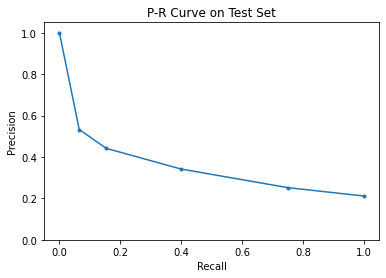

In [35]:
from sklearn.metrics import average_precision_score
yTest = test.iloc[:, 337].astype(int)
xTest = enc.transform(np.array([k_means.predict(test.iloc[:, selector.get_support(indices=True)].to_numpy())]).T).toarray() 


default_params = {'learning_rate': 0.1,
 'n_estimators':1000,
 'max_depth':4,
 'min_child_weight':1,
 'min_split_loss':0, #gamma
 'subsample':0.8,
 'colsample_bytree':0.8,
 'objective': 'binary:logistic',
 'scale_pos_weight': 0.25,
 'seed':42,
 'tree_method':'hist'}
from xgboost import XGBClassifier, plot_importance
xg_model = XGBClassifier(**default_params)
xg_model.fit(enc.transform(np.array([k_means.predict(X_new)]).T).toarray(), train.iloc[:, 337].astype(int))


from sklearn.metrics import f1_score, precision_recall_curve, auc, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

probs = xg_model.predict_proba(xTest)[:,1]
predictions = xg_model.predict(xTest)

precision, recall, _ = precision_recall_curve(yTest, probs)

f1, auc_score = f1_score(yTest, predictions), auc(recall, precision)

print('f1=%.3f auc=%.3f' % (f1, auc_score))
plt.plot(recall, precision, marker='.')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim(0,1.05)
plt.title('P-R Curve on Test Set')

In [36]:
selector.get_support(indices=True)

array([  0,  10,  13,  14,  15,  16,  18,  20,  22,  23,  24,  25,  26,
        27,  42,  43,  48,  49,  50,  52,  54,  56,  57,  58,  60,  62,
        64,  65,  66,  67,  68,  69,  70,  71,  76,  78, 140, 141, 142,
       146, 148, 149, 150, 151, 152, 153, 196, 203, 210, 211, 218, 220,
       222, 224, 225, 232, 238, 239, 244, 246, 248, 250, 252, 253, 258,
       259, 260, 262, 264, 266, 267, 268, 274, 275, 276, 278, 279, 280,
       281, 286, 287, 288, 290, 292, 295, 300, 308, 309, 314, 315, 316,
       318, 320, 321, 322, 323, 328, 330, 332, 334])

Accuracy: 0.7222871757398611
Senstivity/Recall: 0.3485921575401624
Specificity: 0.8225290765024791
Percision: 0.3450752393980848


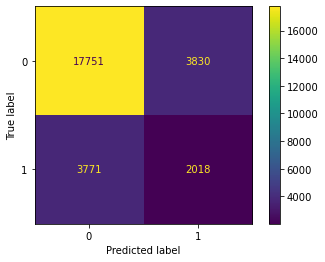

In [6]:
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = k_means.predict(test.iloc[:, selector.get_support(indices=True)].to_numpy())#cross_val_predict(k_means, test.iloc[:, :336], test.iloc[:, 337].astype(int), cv=5)
cm = confusion_matrix(test.iloc[:, 337].astype(int), y_pred)
ConfusionMatrixDisplay(cm).plot()
TN, FP, FN, TP = cm.ravel()
print(f"Accuracy: {(TP+TN) / (TP+TN+FN+FP)}")
print(f"Senstivity/Recall: {TP / (TP+FN)}")
print(f"Specificity: {TN / (TN+FP)}")
print(f"Percision: {TP / (TP+FP)}")
#generate_roc_p_recall_curve(k_means, test.iloc[:, :336], test.iloc[:, 337].astype(int))

In [7]:
def load_data(batch_size):
  """Load the dataset into memory."""
  data = pd.read_csv('train_data.csv') # load original dataset 

  train, test = sklearn.model_selection.train_test_split(data, test_size=.25, random_state=42, shuffle=True, stratify=data['Label'])

  return (tf.data.Dataset.from_tensor_slices((train.copy().drop('Label', axis = 1), train.pop('Label').astype(int))).batch(batch_size),
          tf.data.Dataset.from_tensor_slices((test.copy().drop('Label', axis = 1), test.pop('Label').astype(int))).batch(batch_size))

In [8]:
# Defined in file: ./chapter_linear-networks/softmax-regression-scratch.md
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    """Train a model (defined in Chapter 3)."""
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0, 1.5],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = d2l.train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = d2l.evaluate_accuracy(net, test_iter)
        print(f'train_metrics: {train_metrics}. test_acc: {test_acc}')
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [9]:
from tensorflow.python.keras.utils import losses_utils
net = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(336),
    tf.keras.layers.Dense(24),
    tf.keras.layers.Dense(1)])
batch_size, lr, num_epochs = 255, 0.1, 10
loss = tf.keras.losses.BinaryCrossentropy(
    from_logits=False, label_smoothing=0.0, axis=-1,
    reduction=losses_utils.ReductionV2.AUTO, name='binary_crossentropy'
)
trainer = tf.keras.optimizers.SGD(learning_rate=lr)

train_iter, test_iter = load_data(batch_size)

AssertionError: 3.2941621300637243

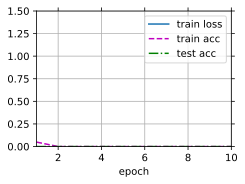

In [10]:
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [11]:
data

,G26,G26_Target Sequence_in_SMILES_perc,G26_SMILES_in_Target Sequence_perc,G26_ARRO,G26_SMILES_base,G26_SMILES_base_perc,G26_Target Sequence_base,G26_Target Sequence_base_perc,G26_fdp_SMILES_base,G26_fdp_Target Sequence_base,...,G10_Target Sequence_base,G10_Target Sequence_base_perc,G10_fdp_SMILES_base,G10_fdp_Target Sequence_base,G10_fd_SMILES_base,G10_fd_Target Sequence_base,G10_std_SMILES_dist,G10_std_Target Sequence_dist,KIBA,Label
0,5.073946,0.954991,0.062554,16.739510,5.522422,0.105597,5.062549,0.098782,-0.849394,0.036227,...,5.645625,0.120050,-0.024235,-0.640176,-0.004603,-0.058854,0.538344,-0.688681,11.900001,False
1,6.826617,0.001154,0.014306,60569.338400,5.590014,0.091748,6.158633,0.126360,0.090594,0.112054,...,5.589494,0.122443,-0.261973,-0.644310,-0.019836,-0.060652,0.032666,-0.720316,11.699999,False
2,5.177106,0.818811,0.930755,1.312142,5.556566,0.128679,5.564309,0.099924,-0.690133,-0.830831,...,5.549520,0.117385,-0.346797,-0.768549,-0.024956,-0.071758,-0.112331,-1.020784,11.300000,False
3,5.179001,0.183497,0.970300,5.616494,5.258327,0.130410,5.683928,0.086053,-0.053087,-0.884247,...,5.784208,0.118799,0.045586,-0.755603,0.018378,-0.067145,1.285098,-0.965758,11.800000,False
4,5.822746,0.029429,0.326915,103.942684,5.621003,0.101558,5.896788,0.281712,0.072129,-0.045202,...,5.631512,0.120159,-0.181766,-0.524913,-0.015458,-0.051385,0.119600,-0.458659,11.600000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109474,5.706429,0.185805,0.114284,47.093032,5.747547,0.107905,5.331223,0.334530,-0.077900,0.220246,...,5.698384,0.118799,0.011541,-0.447291,0.002877,-0.045292,0.756821,-0.292137,11.900001,False
109475,5.091452,0.922677,0.950718,1.139983,5.456824,0.121177,5.444070,0.204634,-0.801500,-0.746084,...,5.560424,0.116188,-0.409694,-0.776436,-0.027857,-0.072332,-0.220516,-1.035303,11.200000,False
109476,6.546598,0.016157,0.045692,1354.569388,5.250993,0.129833,6.357718,0.109280,0.113676,0.063588,...,6.345158,0.116732,0.112522,-0.822454,0.119631,-0.069714,4.592568,-1.243952,11.699999,False
109477,5.049065,0.941720,0.965568,1.099754,5.300778,0.118292,5.390484,0.150946,-0.823428,-0.814621,...,5.543945,0.116678,-0.590883,-0.697346,-0.035138,-0.064793,-0.470926,-0.808453,11.900001,False


In [37]:
import sweetviz as sv
#analyzing the dataset

advert_report = sv.analyze(data.iloc[: , 200:339])
#display the report

advert_report.show_html(filepath='last_features.html',
            layout='widescreen', 
            scale=None)

                                             |                                                                …

/Users/bwubete/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)


Report last_features.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [35]:
advert_report.show_html(filepath='first_200_features.html',
            layout='widescreen', 
            scale=None)

Report first_200_features.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:


# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

abalone_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam())

In [ ]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
3422/3422 [==============================] - 7s 2ms/step - loss: 1028308736.0000
Epoch 2/10
3422/3422 [==============================] - 7s 2ms/step - loss: 566532608.0000
Epoch 3/10
3422/3422 [==============================] - 6s 2ms/step - loss: 631893376.0000
Epoch 4/10
3422/3422 [==============================] - 6s 2ms/step - loss: 398156672.0000
Epoch 5/10
3422/3422 [==============================] - 6s 2ms/step - loss: 110368792.0000
Epoch 6/10
3422/3422 [==============================] - 6s 2ms/step - loss: 26477078.0000
Epoch 7/10
3422/3422 [==============================] - 6s 2ms/step - loss: 47782264.0000
Epoch 8/10
3422/3422 [==============================] - 6s 2ms/step - loss: 13180386.0000
Epoch 9/10
3422/3422 [==============================] - 6s 2ms/step - loss: 14557719.0000
Epoch 10/10
3422/3422 [==============================] - 7s 2ms/step - loss: 5530712.0000


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
df = train
scaler = StandardScaler()

kmeans_kwargs = {"init": "random","n_init": 20,"max_iter": 1000,"random_state": 1984}
cut_off=0.5
maxvars=3
kmin=2
kmax=8
cols=list(df.columns)

results_for_each_k=[]
vars_for_each_k={}

for k in range(kmin,kmax+1):
    print(k)
    selected_variables=[]
    while(len(selected_variables)<maxvars):
        results=[]
        for col in cols:
            scols=[]
            scols.extend(selected_variables)
            scols.append(col) 
            kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
            kmeans.fit(df[scols])
            results.append(silhouette_score(df[scols], kmeans.predict(df[scols])))
        selected_var=cols[np.argmax(results)]
        selected_variables.append(selected_var)
        cols.remove(selected_var)
    results_for_each_k.append(max(results))
    vars_for_each_k[k]=selected_variables


best_k=np.argmax(results_for_each_k)+kmin
#you can also force a value for k
#best_k=3
selected_variables=vars_for_each_k[best_k]
print(best_k)
print(selected_variables)

2


/var/folders/fs/sck0dtnd1b9_0kystds1j1180000gp/T/ipykernel_52364/1560837991.py:27: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(df[scols])


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [11]:
train.columns[::14]

Index(['G26', 'G3', 'G25', 'G31', 'G14', 'G2', 'G5', 'G6', 'G7', 'G8', 'G9',
       'G12', 'G15', 'G17', 'G21', 'G27', 'G28', 'G32', 'G36', 'G37', 'G38',
       'G39', 'G24', 'G10', 'KIBA'],
      dtype='object')

In [6]:
import numpy as np
import pandas as pd
import plotly.figure_factory as ff
import plotly.express as px
import plotly.io as pio
import statsmodels.api as sm
import numpy as np
import pandas as pd

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.feature_selection import SelectKBest, SelectFpr, chi2, f_classif
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Adopted from reference 2
def generate_roc_p_recall_curve(classifier, X, y):
    import numpy as np
    import matplotlib.pyplot as plt

    from sklearn import svm, datasets
    from sklearn.metrics import auc
    from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
    from sklearn.model_selection import StratifiedKFold

    # # #############################################################################
    # # Data IO and generation

    # # Import some data to play with
    # iris = datasets.load_iris()
    # X = iris.data
    # y = iris.target
    # X, y = X[y != 2], y[y != 2]
    n_samples, n_features = X.shape

    # Add noisy features
    random_state = np.random.RandomState(1)
    X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

    # #############################################################################
    # Classification and ROC analysis

    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_splits=5)
    #classifier = GaussianNB() #svm.SVC(kernel="linear", probability=True, random_state=random_state)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = plot_roc_curve(classifier, X[test], y[test],
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()
    tprs = []
    aucs = [1]
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = plot_precision_recall_curve(classifier, X[test], y[test],
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.precision, viz.recall)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        #aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            #label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Percision Recall Curve")
    ax.legend(loc="lower right")
    plt.show()